# Stats

## Corpus (all 40 odes)

In [ ]:
from src.stats_comp import compatibility_corpus, compatibility_ratios_to_stats

def count_leaves(obj):
    """Count all leaf (non-list) elements in a nested structure."""
    if isinstance(obj, list):
        return sum(count_leaves(item) for item in obj)
    else:
        return 1
    
all_ratio_sets_triads = compatibility_corpus('data/compiled/triads/')
all_ratio_sets_strophes = compatibility_corpus('data/compiled/strophes/')
all_ratio_sets_epodes = compatibility_corpus('data/compiled/epodes/')
total_comp_triads = compatibility_ratios_to_stats(all_ratio_sets_triads)
total_comp_strophes = compatibility_ratios_to_stats(all_ratio_sets_strophes)
total_comp_epodes = compatibility_ratios_to_stats(all_ratio_sets_epodes)

# Count total number of leaf values
total_triads = sum(count_leaves(lst) for lst in all_ratio_sets_triads)
total_strophes = sum(count_leaves(lst) for lst in all_ratio_sets_strophes)
total_epodes = sum(count_leaves(lst) for lst in all_ratio_sets_epodes)

print ('--------------------------------------------')
print(f'TRIADS: \nTotal corpus comp (all 40 odes): \033[1;32m{total_comp_triads}\033[0m')
print(f'Triads: Number of variables: {total_triads}')
print ('--------------------------------------------')

print ('--------------------------------------------')
print(f'STROPHES: \nTotal corpus comp: \033[1;32m{total_comp_strophes}\033[0m')
print(f'Strophes: Number of variables: {total_strophes}')
print ('--------------------------------------------')

print ('--------------------------------------------')
print(f'EPODES: \nTotal corpus comp: \033[1;32m{total_comp_epodes}\033[0m')
print(f'Epodes: Number of variables: {total_epodes}')
print ('--------------------------------------------')



--------------------------------------------
TRIADS: 
Total corpus comp (all 40 odes): 0.7789780261043113
Triads: Number of variables: 11379
--------------------------------------------
--------------------------------------------
STROPHES: 
Total corpus comp: 0.7622597186985676
Strophes: Number of variables: 5560
--------------------------------------------

--------------------------------------------
EPODES: 
Total corpus comp: 0.7833079934483543
Epodes: Number of variables: 3491
--------------------------------------------



Example of computing compatibility score for sets of positions, and showing its just *averaging*:

In [5]:
from src.stats_comp import compatibility_ratios_to_stats

first_line = [0.6923076923076923, 0.7692307692307693, 0.5384615384615384, 0.6153846153846154, 0.5384615384615384, 0.6153846153846154, 0.7692307692307693, 0.8461538461538461, 0.6153846153846154, 0.9230769230769231, 1.0]

average = sum(first_line) / len(first_line)

print(f'Average of first line: {average}')

print(compatibility_ratios_to_stats(first_line))

assert average == compatibility_ratios_to_stats(first_line)



Average of first line: 0.7202797202797203
0.7202797202797203


## Clusters

## Single heatmap

Let's first make a text matrix of the sylls of the first strophe, to have something as a handy reference overlay on the heatmap.

In [1]:
from src.utils.utils import get_text_matrix

# Print the shape
text_matrix, row_lengths = get_text_matrix("data/compiled/py04_manual.xml", strophe_index=1)
num_rows = len(text_matrix)
row_lengths = [len(row) for row in text_matrix]
print(f"Number of rows: {num_rows}")
print(f"Length of each row: {row_lengths}")

Number of rows: 23
Length of each row: [11, 23, 20, 15, 15, 18, 14, 8, 11, 23, 20, 15, 15, 18, 14, 8, 19, 19, 15, 20, 16, 12, 19]


In [1]:
from src.utils.utils import get_text_matrix

# Print the shape
text_matrix, row_lengths = get_text_matrix("data/compiled/ht_olympians_triads.xml", canticum_index=1)
num_rows = len(text_matrix)
row_lengths = [len(row) for row in text_matrix]
print(f"Number of rows: {num_rows}")
print(f"Length of each row: {row_lengths}")

Number of rows: 30
Length of each row: [15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10, 15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10, 19, 14, 13, 17, 13, 12, 10, 18]


Here's a full code for making a heatmap with text overlay:

Number of rows: 23
Length of each row: [11, 23, 20, 15, 15, 18, 14, 8, 11, 23, 20, 15, 15, 18, 14, 8, 19, 19, 15, 20, 16, 12, 19]


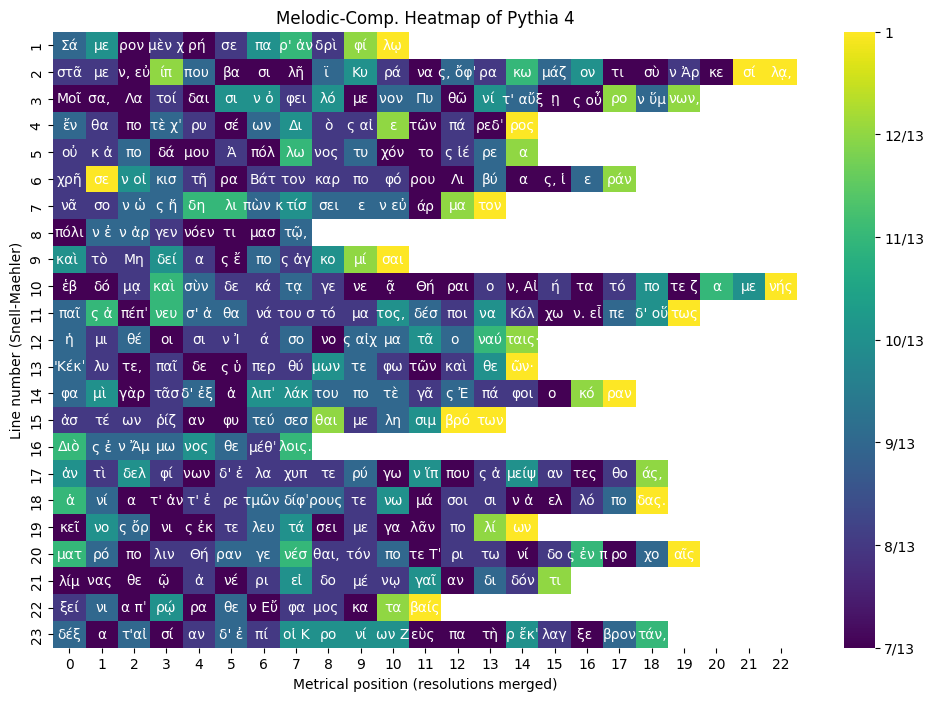

In [5]:
from src.utils.utils import get_text_matrix

# -----------------------------
# Prepare text matrix
# -----------------------------

text_matrix, row_lengths = get_text_matrix("data/compiled/py04_manual.xml", canticum_index=1)
num_rows = len(text_matrix)
row_lengths = [len(row) for row in text_matrix]

print(f"Number of rows: {num_rows}")
print(f"Length of each row: {row_lengths}")

# -----------------------------
# Plot heatmap with text
# -----------------------------

from fractions import Fraction
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.stats_comp import compatibility_play

data = compatibility_play('data/compiled/py04_manual.xml')

# Unwrap nested tensor structure
data_matrix = data[0]

# -----------------------------
# Shape check
# -----------------------------
num_rows_text = len(text_matrix)
num_rows_data = len(data_matrix)

if num_rows_text != num_rows_data:
    raise ValueError(f"Number of rows mismatch: text_matrix={num_rows_text}, data_matrix={num_rows_data}")

max_len_text = max(len(row) for row in text_matrix)
max_len_data = max(len(row) for row in data_matrix)

if max_len_text != max_len_data:
    raise ValueError(f"Row length mismatch: max text length={max_len_text}, max data length={max_len_data}")

# -----------------------------
# Pad numeric matrix for heatmap
# -----------------------------
max_len = max_len_data
padded_data = np.full((len(data_matrix), max_len), np.nan)
for i, row in enumerate(data_matrix):
    padded_data[i, :len(row)] = row


min_val = np.nanmin(padded_data)
min_frac = Fraction(min_val).limit_denominator()  # exact rational

# denominator b
den = min_frac.denominator
start = min_frac.numerator

# Generate fractions from a/b to b/b
fractions = [Fraction(n, den) for n in range(start, den + 1)]
tick_positions = [float(fr) for fr in fractions]
tick_labels = [str(fr) for fr in fractions]

# -----------------------------
# Plot heatmap
# -----------------------------
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    padded_data,
    cmap="viridis",
    mask=np.isnan(padded_data),
    cbar=True,
    cbar_kws={'ticks': tick_positions}
)

# Set fraction labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticklabels(tick_labels)

# Overlay text
for i, row in enumerate(text_matrix):
    for j, val in enumerate(row):
        ax.text(
            j + 0.5, i + 0.5,
            val,
            ha='center', va='center',
            color='white', fontsize=10
        )

plt.xlabel("Metrical position (resolutions merged)")
plt.ylabel("Line number (Snell-Maehler)")
plt.title("Melodic-Comp. Heatmap of Pythia 4")
plt.yticks(
    ticks=np.arange(len(data_matrix)) + 0.5,
    labels=np.arange(1, len(data_matrix) + 1)
)

plt.savefig("media/plots/heatmap_pythia_4_comp.png", dpi=600, bbox_inches="tight")
plt.show()

A striking aesthetic effect can be achieved by removing all text, a good fit for posters:

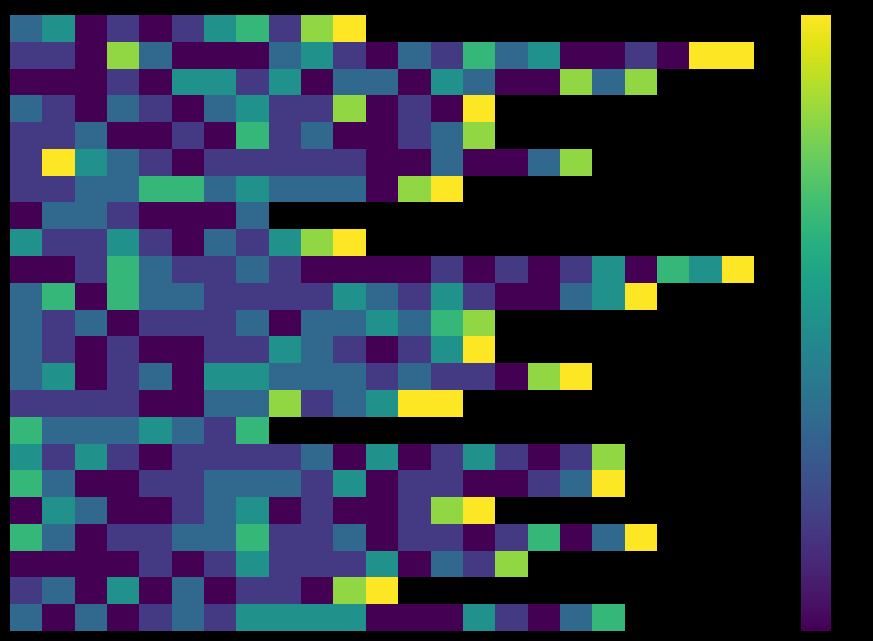

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.stats_comp import compatibility_play

data = compatibility_play('data/compiled/py04.xml')

# Unwrap nested tensor structure (unwrap once for "play" with one song)
data_matrix = data[0]

num_rows_data = len(data_matrix)
max_len_data = max(len(row) for row in data_matrix)

# -----------------------------
# Pad numeric matrix for heatmap
# -----------------------------
max_len = max_len_data
padded_data = np.full((len(data_matrix), max_len), np.nan)
for i, row in enumerate(data_matrix):
    padded_data[i, :len(row)] = row

# -----------------------------
# Plot heatmap (dark mode, no text overlay)
# -----------------------------
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    padded_data, 
    cmap="viridis", 
    mask=np.isnan(padded_data), 
    cbar=True,
    vmax = 1
)

# Dark background + white labels
ax.set_facecolor("black")
ax.figure.set_facecolor("black")
ax.tick_params(colors="white")  # tick labels
ax.xaxis.label.set_color("white")
ax.yaxis.label.set_color("white")
ax.title.set_color("white")

# plt.xlabel("Metrical position (resolutions merged)")
# plt.ylabel("Line number (Snell-Maehler)")
# plt.title("Melodic-Comp. Heatmap of Pythia 4")
# plt.yticks(
#     ticks=np.arange(len(data_matrix)) + 0.5,
#     labels=np.arange(1, len(data_matrix)+1)
# )
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("media/plots/heatmap_notext_invertedcolours_pythia_4_comp.png", dpi=600)
plt.show()

## Set of heatmaps

Number of rows: 30
Length of each row: [15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10, 15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10, 19, 14, 13, 17, 13, 12, 10, 18]


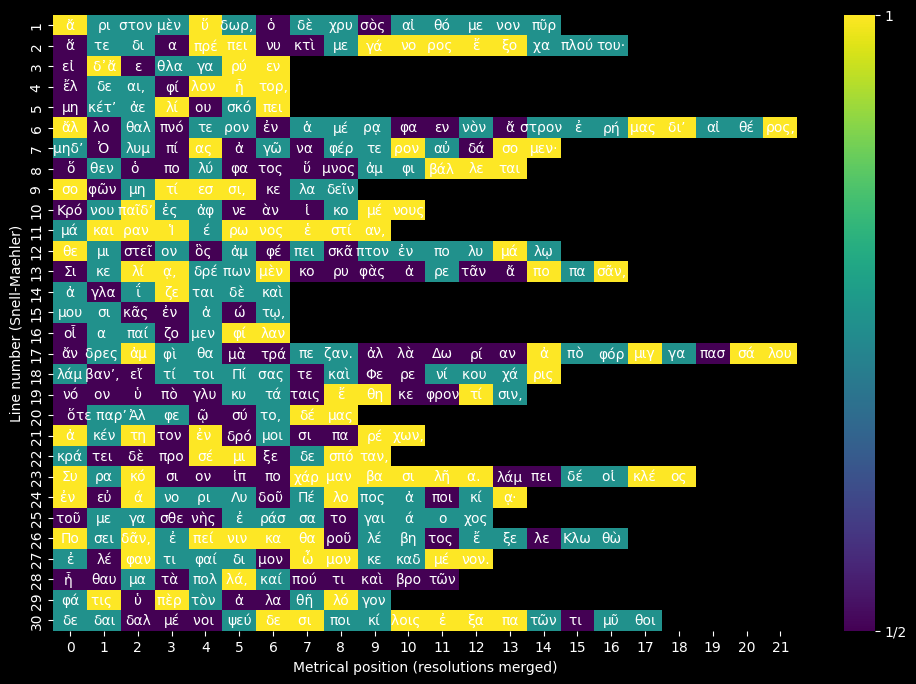

In [8]:
from fractions import Fraction
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.stats_comp import compatibility_canticum
from src.utils.utils import get_text_matrix

xml_file = 'data/compiled/ht_olympians_triads.xml'
canticum_id = "ol01"
canticum_idx = int(canticum_id[-2:])

# -----------------------------
# Prepare text matrix
# -----------------------------

text_matrix, row_lengths = get_text_matrix(xml_file, canticum_index=canticum_idx)
num_rows = len(text_matrix)
row_lengths = [len(row) for row in text_matrix]

print(f"Number of rows: {num_rows}")
print(f"Length of each row: {row_lengths}")

# -----------------------------
# Plot heatmap with text
# -----------------------------

data_matrix = compatibility_canticum(xml_file, canticum_ID=canticum_id)

# -----------------------------
# Shape check
# -----------------------------
num_rows_text = len(text_matrix)
num_rows_data = len(data_matrix)

if num_rows_text != num_rows_data:
    raise ValueError(f"Number of rows mismatch: text_matrix={num_rows_text}, data_matrix={num_rows_data}")

max_len_text = max(len(row) for row in text_matrix)
max_len_data = max(len(row) for row in data_matrix)

if max_len_text != max_len_data:
    raise ValueError(f"Row length mismatch: max text length={max_len_text}, max data length={max_len_data}")

# -----------------------------
# Pad numeric matrix for heatmap
# -----------------------------
max_len = max_len_data
padded_data = np.full((len(data_matrix), max_len), np.nan)
for i, row in enumerate(data_matrix):
    padded_data[i, :len(row)] = row


min_val = np.nanmin(padded_data)
min_frac = Fraction(min_val).limit_denominator()  # exact rational

# denominator b
den = min_frac.denominator
start = min_frac.numerator

# Generate fractions from a/b to b/b
fractions = [Fraction(n, den) for n in range(start, den + 1)]
tick_positions = [float(fr) for fr in fractions]
tick_labels = [str(fr) for fr in fractions]

# -----------------------------
# Plot heatmap
# -----------------------------
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    padded_data,
    cmap="viridis",
    mask=np.isnan(padded_data),
    cbar=True,
    cbar_kws={'ticks': tick_positions}
)

# Dark background + white labels
ax.set_facecolor("black")
ax.figure.set_facecolor("black")
ax.tick_params(colors="white")  # tick labels
ax.xaxis.label.set_color("white")
ax.yaxis.label.set_color("white")
ax.title.set_color("white")

# Set fraction labels
colorbar = ax.collections[0].colorbar
colorbar.set_ticklabels(tick_labels)
colorbar.ax.tick_params(colors='white')

# Overlay text
for i, row in enumerate(text_matrix):
    for j, val in enumerate(row):
        ax.text(
            j + 0.5, i + 0.5,
            val,
            ha='center', va='center',
            color='white', fontsize=10
        )

plt.xlabel("Metrical position (resolutions merged)")
plt.ylabel("Line number (Snell-Maehler)")
#plt.title("Melodic-Comp. Heatmap of Pythia 4")
plt.yticks(
    ticks=np.arange(len(data_matrix)) + 0.5,
    labels=np.arange(1, len(data_matrix) + 1)
)

plt.savefig("media/plots/heatmap_olympia_1_comp.png", dpi=600, bbox_inches="tight")
plt.show()

### Olympians 

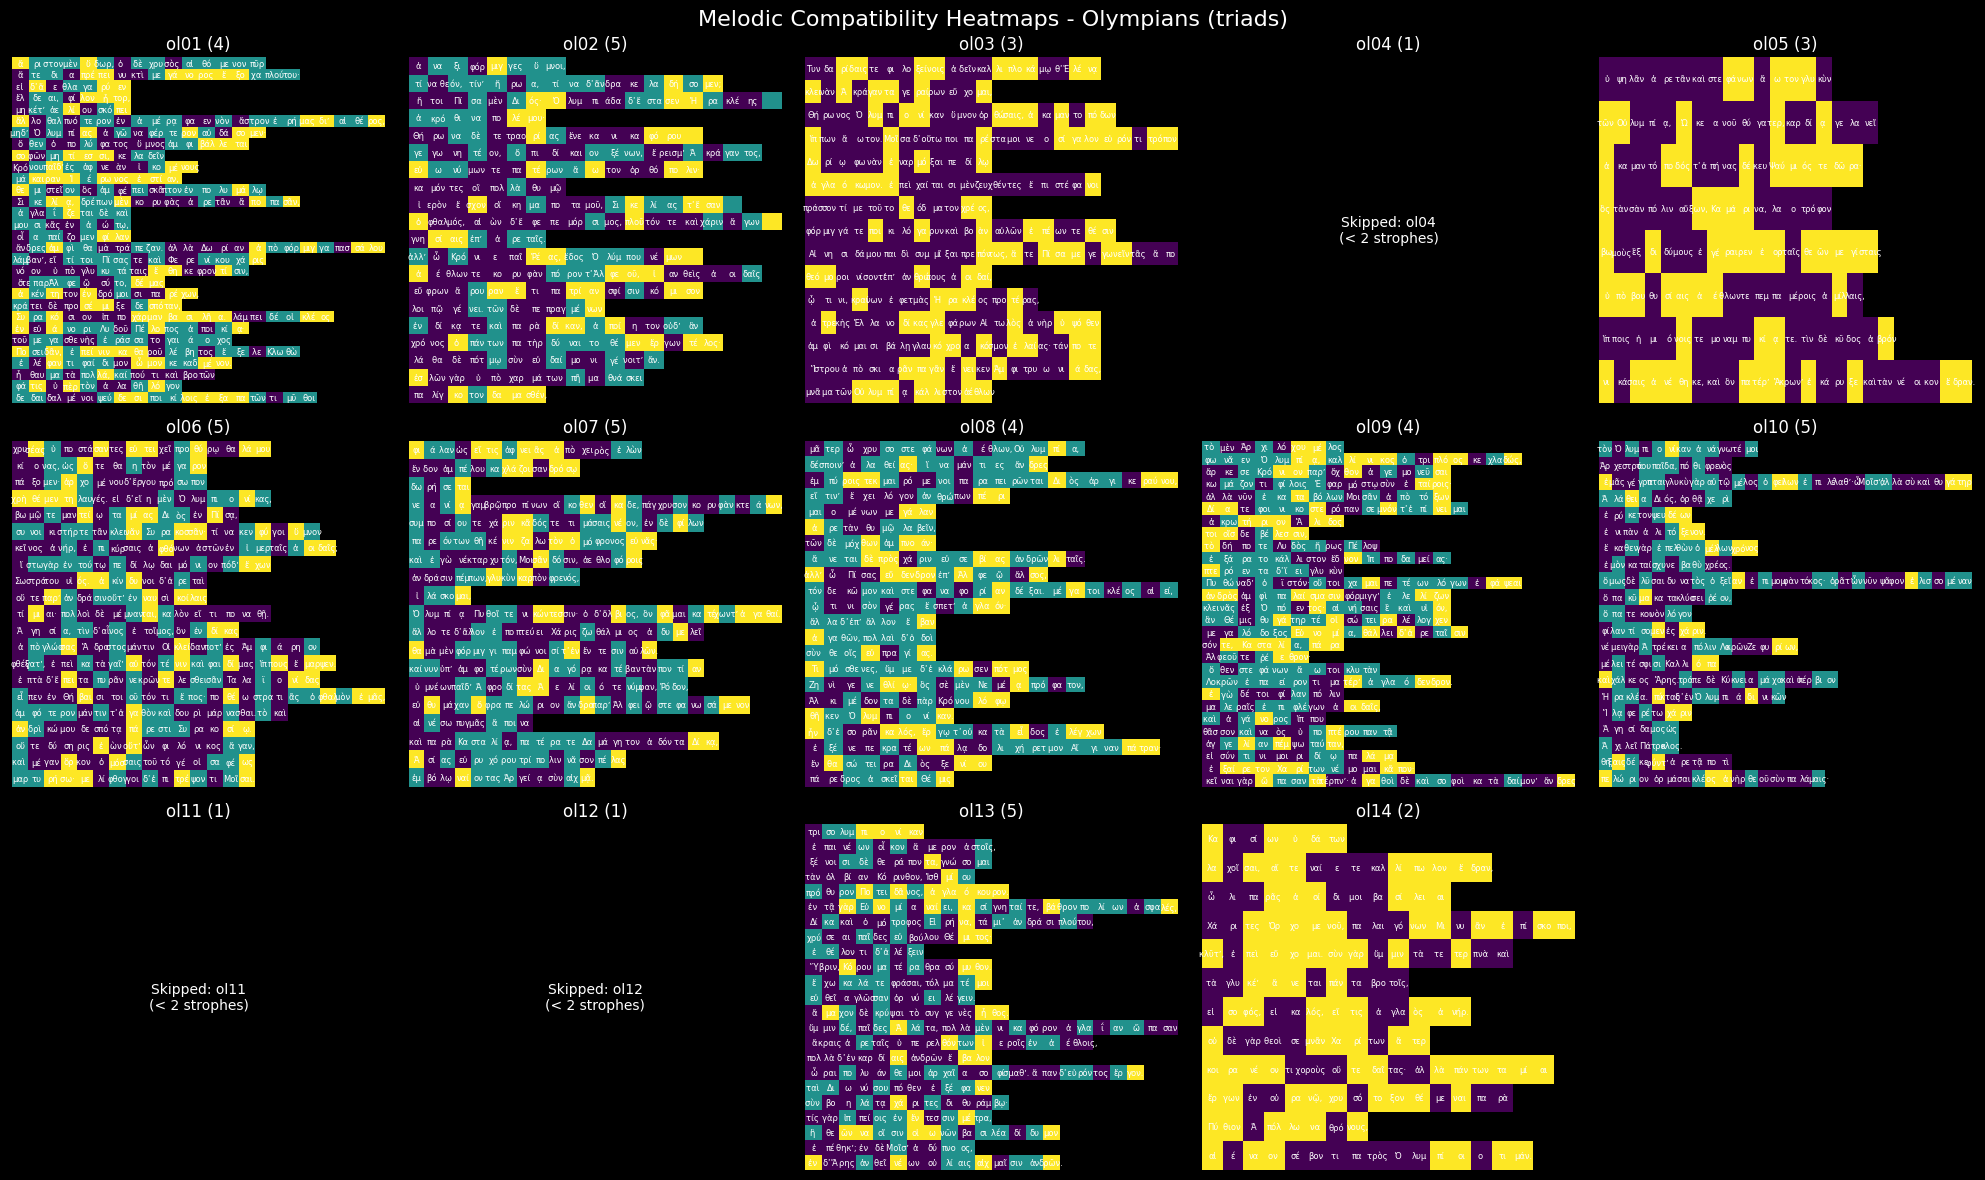

In [10]:
from heatmaps import make_all_heatmaps
make_all_heatmaps('data/compiled/ht_olympians_triads.xml', prefix="ol", suptitle="Melodic Compatibility Heatmaps - Olympians (triads)")

### Isthmians

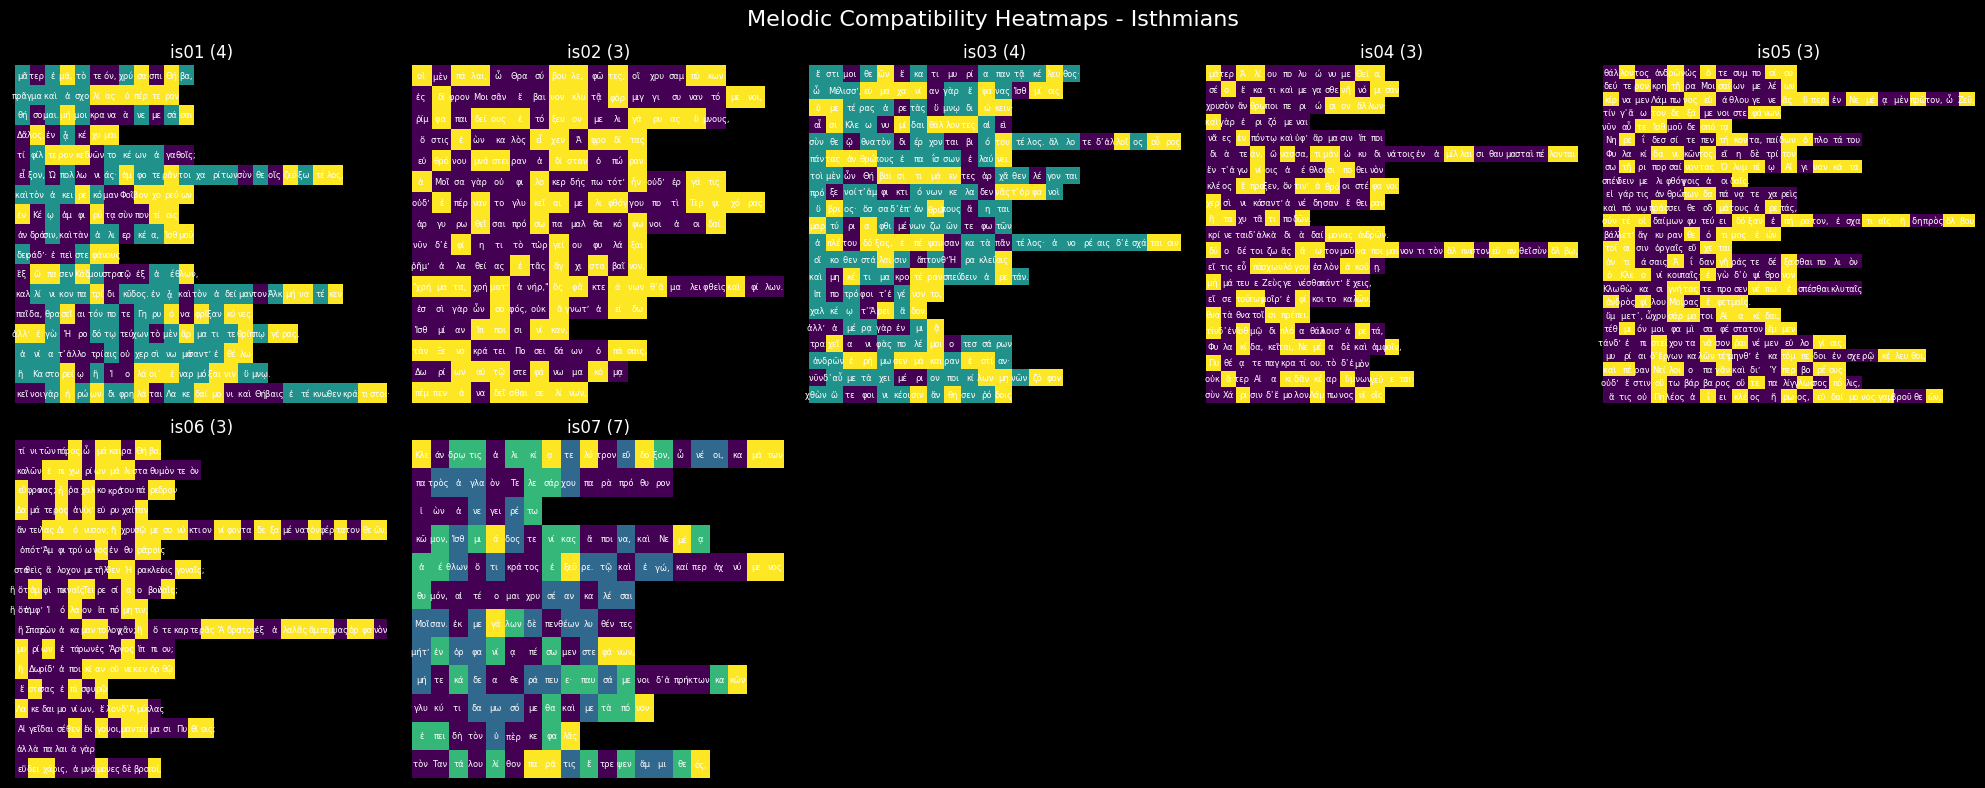

In [1]:
from heatmaps import make_all_heatmaps
make_all_heatmaps('data/compiled/ht_isthmians_triads.xml', prefix="is", suptitle="Melodic Compatibility Heatmaps - Isthmians")

### Nemeans

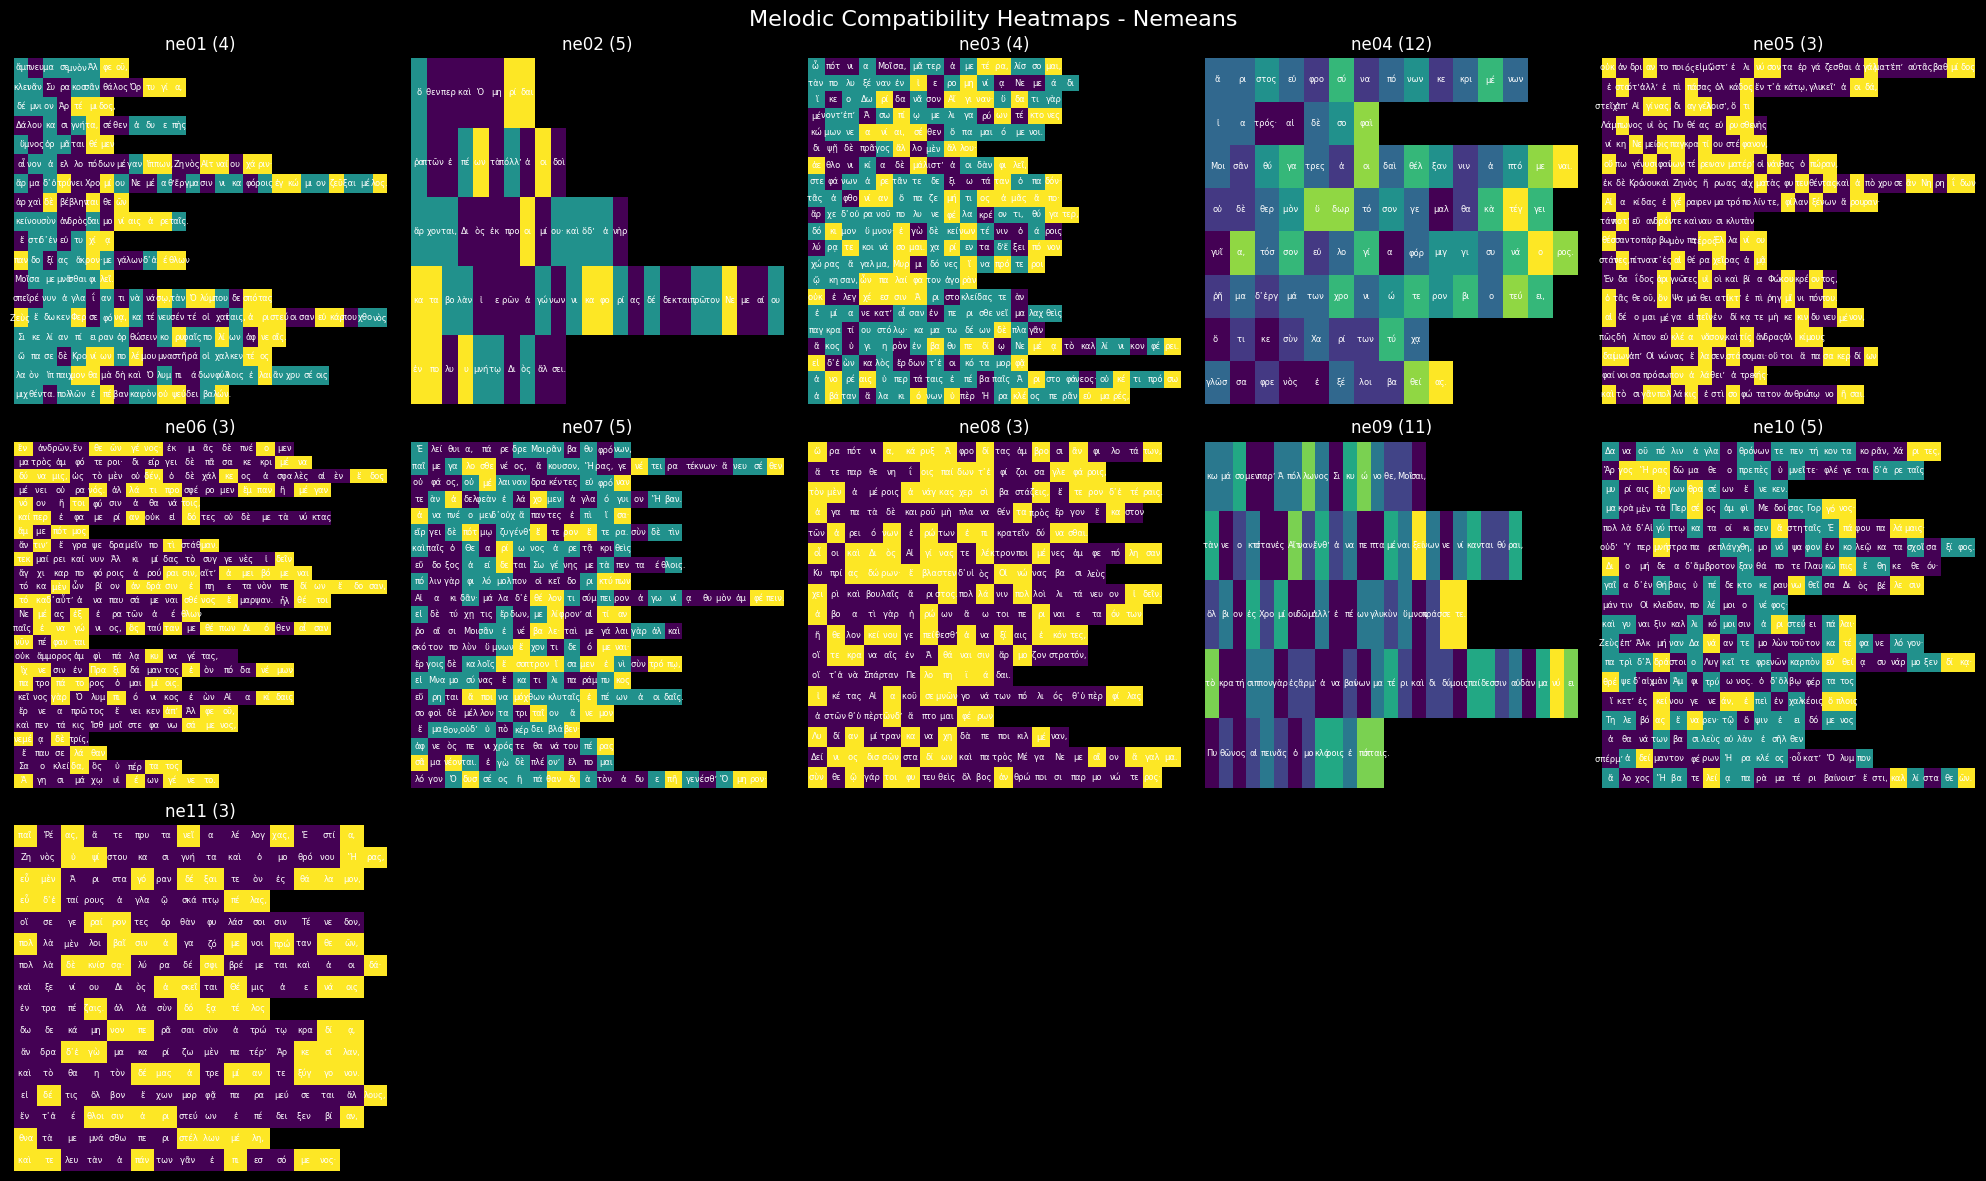

In [ ]:
from heatmaps import make_all_heatmaps
make_all_heatmaps('data/compiled/ht_nemeans_triads.xml', prefix="ne", suptitle="Melodic Compatibility Heatmaps - Nemeans")

### Pythians

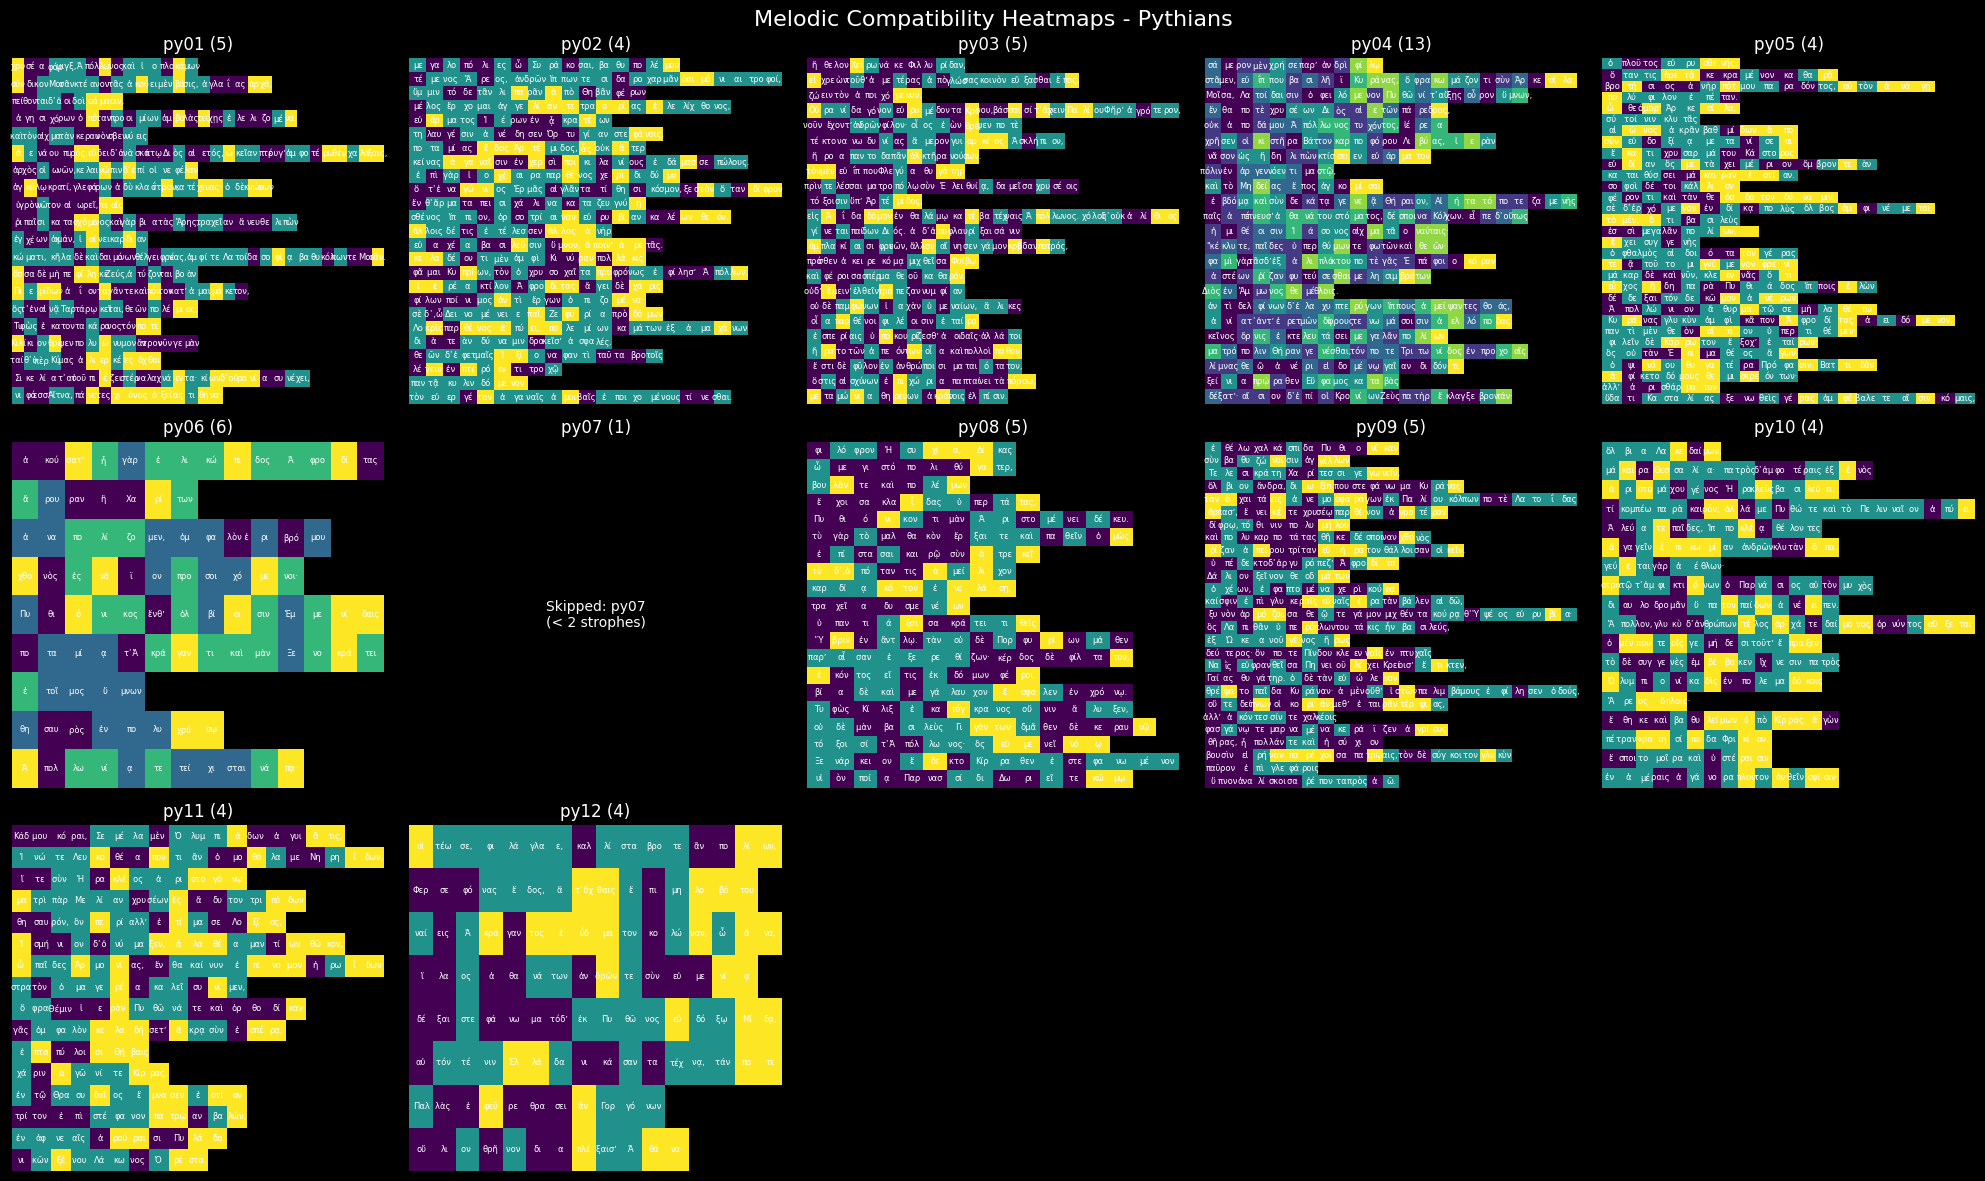

In [1]:
from heatmaps import make_all_heatmaps
make_all_heatmaps('data/compiled/ht_pythians_triads.xml', prefix="py", suptitle="Melodic Compatibility Heatmaps - Pythians")